In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X = pd.read_csv(r'..\dataset\podaci_za_klasterovanje\X')
X

,Principal_component_0,Principal_component_1
0,12.661187,3.361756
1,-1.788860,0.837765
2,0.218039,-1.026207
3,-0.654248,-0.465897
4,3.602288,2.828493
...,...,...
1335,0.305838,1.811039
1336,0.241364,-0.924689
1337,-2.128252,0.752848
1338,1.046243,-1.846078


In [3]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, n_init='auto')

In [4]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [5]:
# koja instanca pripada kom klasteru
X[kmeans.labels_ == 0]

,Principal_component_0,Principal_component_1
1,-1.788860,0.837765
2,0.218039,-1.026207
3,-0.654248,-0.465897
5,-0.634045,1.584326
6,-4.169724,0.439712
...,...,...
1332,-0.696818,0.921604
1334,-0.770353,-0.018163
1335,0.305838,1.811039
1336,0.241364,-0.924689


In [6]:
pca_names = ['Principal_component_0', 'Principal_component_1']

In [7]:
#centroide
centers = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
centers

,Principal_component_0,Principal_component_1
0,-1.650993,-0.000514
1,3.654355,0.001137


In [8]:
#SSE
kmeans.inertia_

7061.530848622746

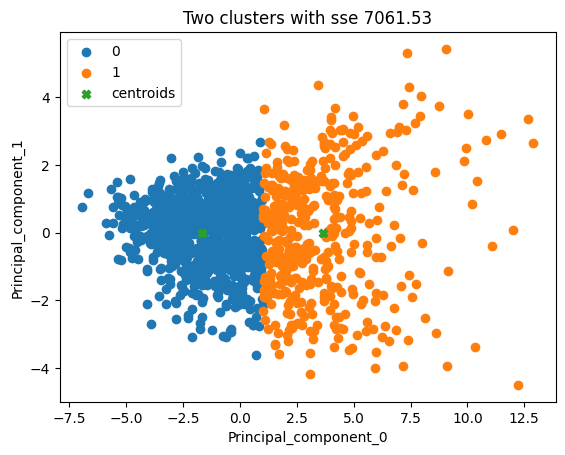

In [9]:
for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['Principal_component_0'], elems['Principal_component_1'], label=c)

plt.scatter(centers['Principal_component_0'], centers['Principal_component_1'], marker='X', label='centroids')

plt.xlabel('Principal_component_0')
plt.ylabel('Principal_component_1')
plt.title('Two clusters with sse {}'.format(round(kmeans.inertia_, 2)))
plt.legend()
plt.show()

In [10]:
X[kmeans.labels_ == 1]

,Principal_component_0,Principal_component_1
0,12.661187,3.361756
4,3.602288,2.828493
10,5.028141,2.903144
12,2.046025,2.134106
15,3.204765,0.784335
...,...,...
1328,3.095778,2.030115
1330,4.166865,0.699105
1333,1.345545,-1.713093
1338,1.046243,-1.846078


In [11]:
X[kmeans.labels_ == 0]

,Principal_component_0,Principal_component_1
1,-1.788860,0.837765
2,0.218039,-1.026207
3,-0.654248,-0.465897
5,-0.634045,1.584326
6,-4.169724,0.439712
...,...,...
1332,-0.696818,0.921604
1334,-0.770353,-0.018163
1335,0.305838,1.811039
1336,0.241364,-0.924689


In [12]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([ 0.33143188,  0.67285966,  0.37085282, ...,  0.68824358,
       -0.05594922,  0.1676392 ])

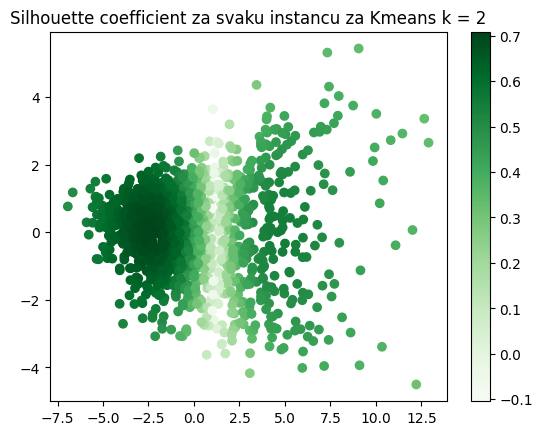

In [13]:
plt.scatter(X['Principal_component_0'], X['Principal_component_1'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 2")
plt.show()

In [14]:
kmeans.cluster_centers_

array([[-1.65099263e+00, -5.13547094e-04],
       [ 3.65435538e+00,  1.13670016e-03]])

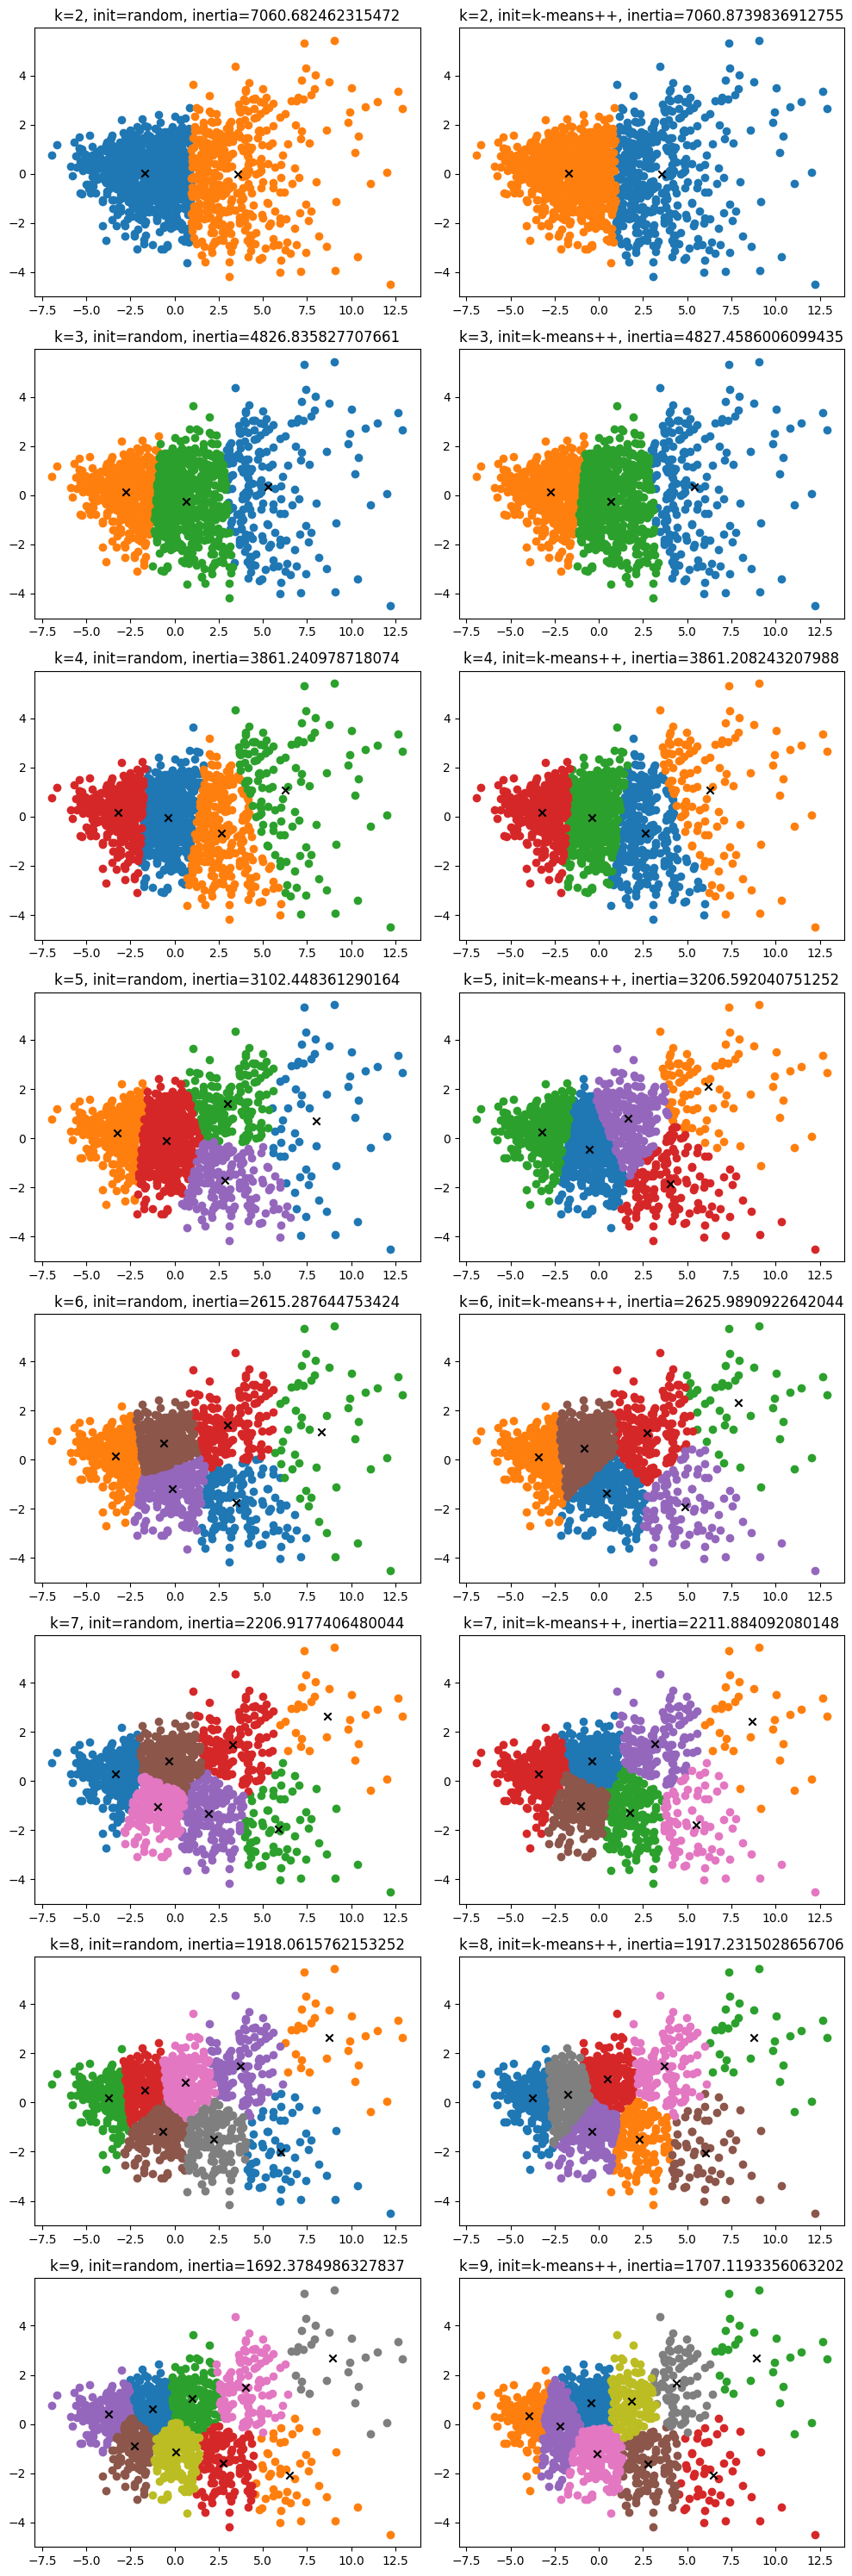

In [15]:
#kod preuzet sa oficijalnog github repozitoriuma predmeta

from sklearn.metrics import silhouette_score
ks = range(2, 10) # [)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []
for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))

        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        for label in range(k):
            cluster = X[kmeans.labels_ == label]
            plt.scatter(cluster['Principal_component_0'], cluster['Principal_component_1'])
        
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
        plt.scatter(centroids['Principal_component_0'], centroids['Principal_component_1'], color='black', marker='x')
            
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

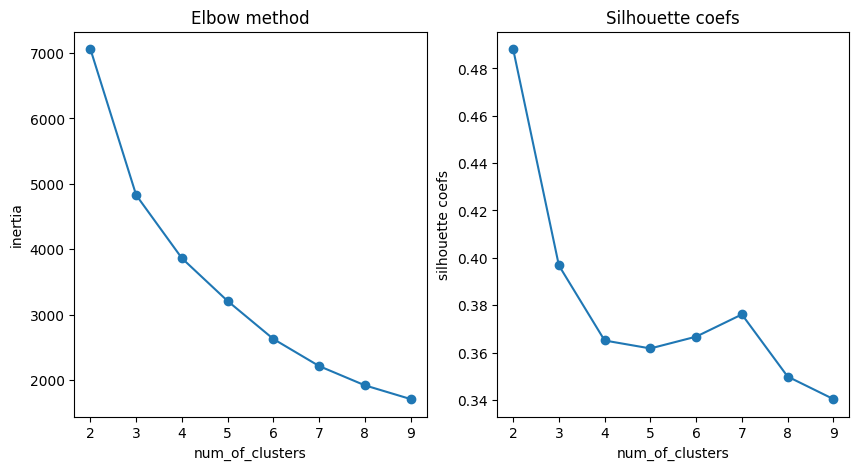

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.48843520983525734
For n_clusters = 3 The average silhouette_score is : 0.3923390495748702
For n_clusters = 4 The average silhouette_score is : 0.3752465450929451
For n_clusters = 5 The average silhouette_score is : 0.3884817351717551


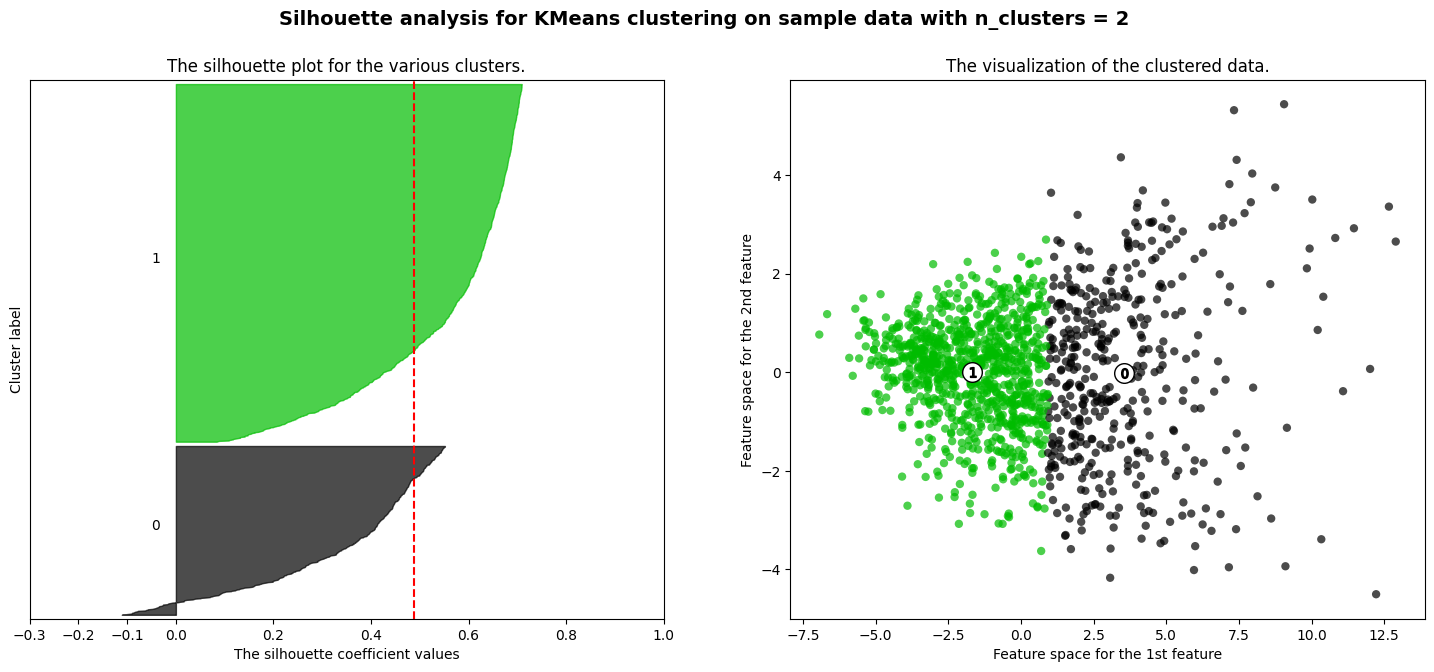

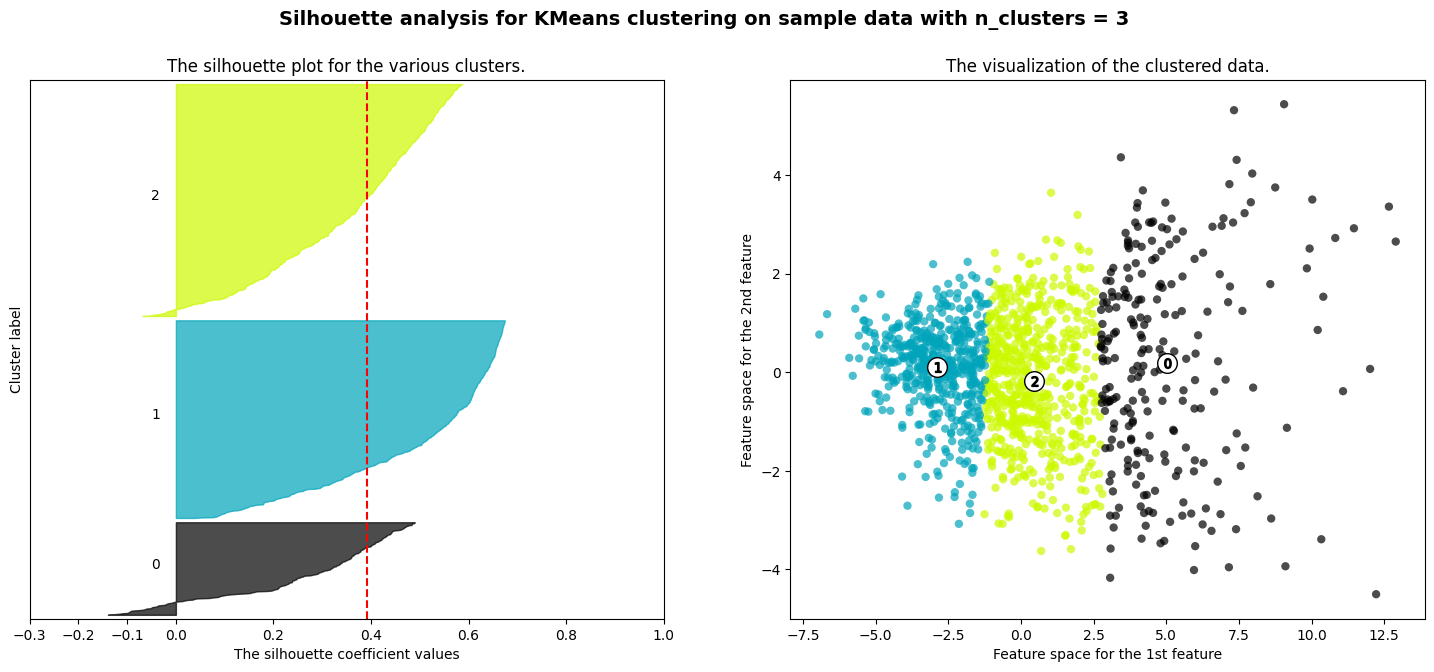

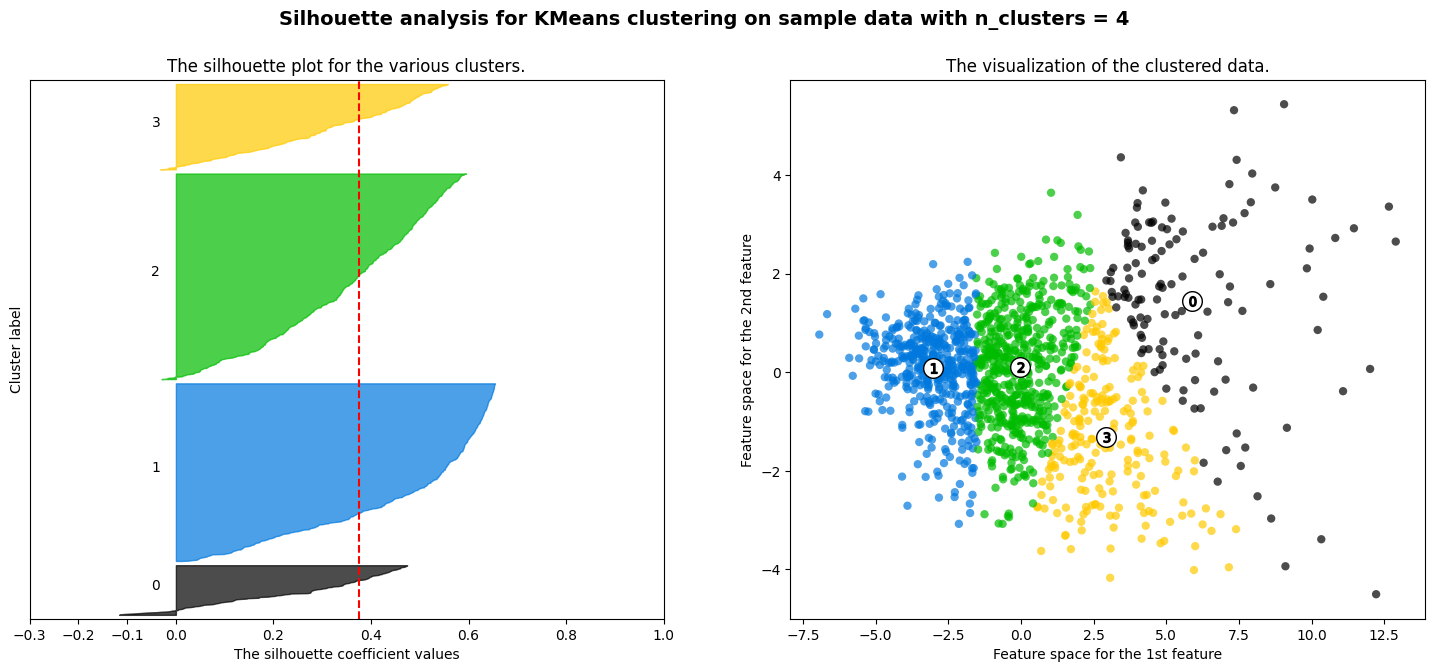

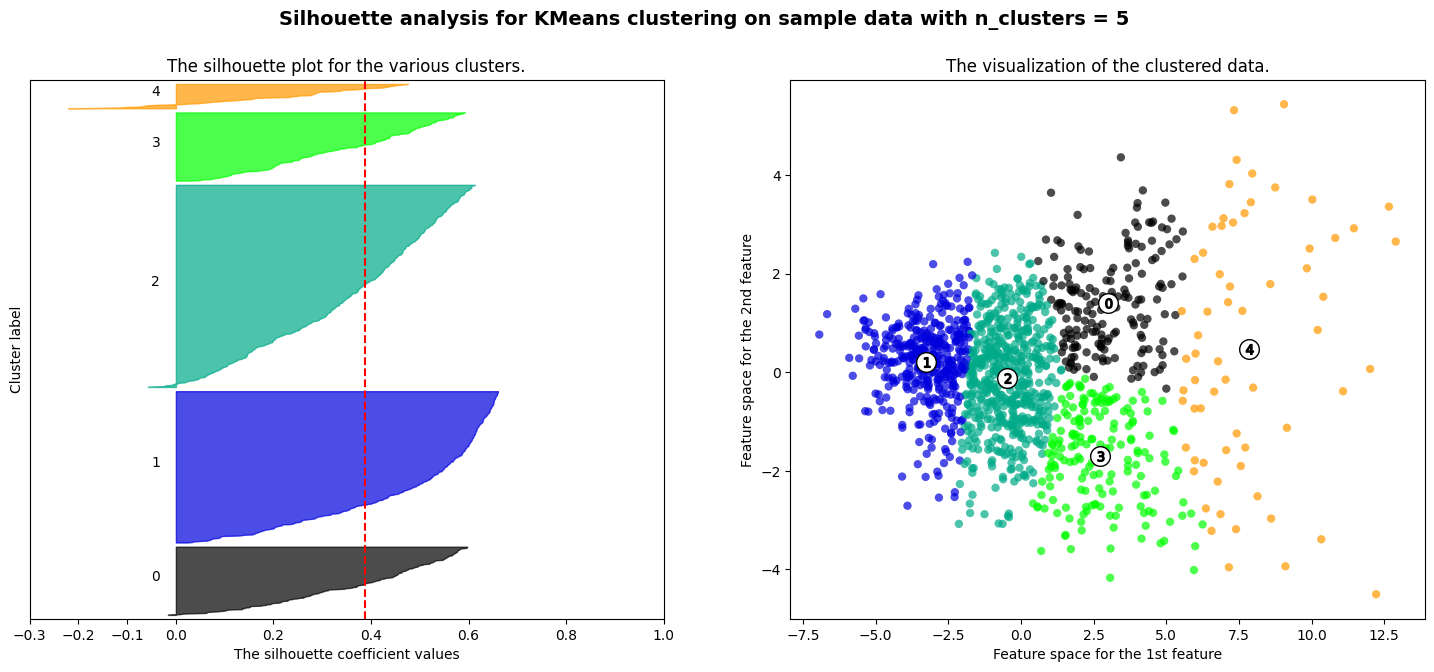

In [17]:
#kod preuzet sa oficijalnog github repozitoriuma predmeta

# pomoćna funkcija za silhouette diagram plot (preuzeto sa https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['Principal_component_0'], X['Principal_component_1'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [35]:
from sklearn. cluster import BisectingKMeans
bkmeans = BisectingKMeans(n_clusters=2,bisecting_strategy='largest_cluster')
bkmeans

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=2)

In [36]:
def visualize_clustering(data, centers, labels, feature_names, alg_name):

    for c in np.unique(labels):
        elems = X[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)

    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")

        
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[0])
    plt.title('{} {} clusters'.format(alg_name, len(centers)))
    plt.legend()


In [37]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=2)

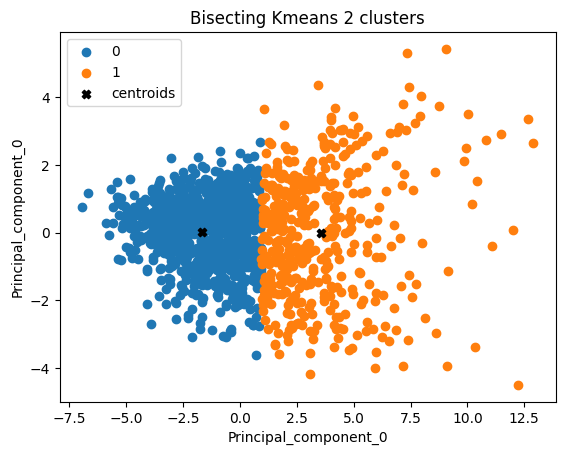

In [38]:
visualize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, "Bisecting Kmeans")

In [23]:
# !pip install scikit-fuzzy

In [24]:
# !pip install fuzzy-c-means
from fcmeans import FCM

In [30]:
fcm = FCM(n_clusters=2, m=3)
fcm.fit(X.to_numpy())

In [31]:
labels = fcm.predict(X.to_numpy())

In [32]:
centers = fcm.centers

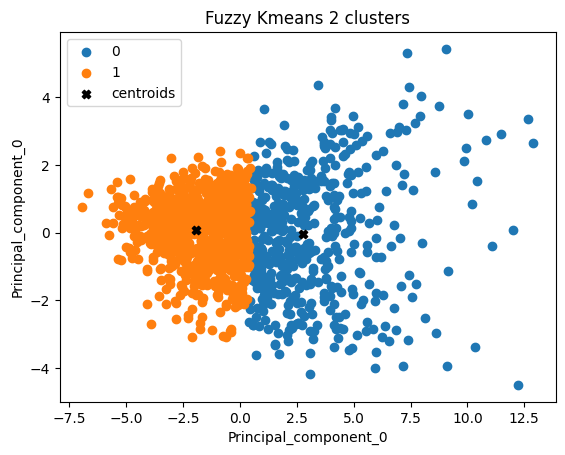

In [33]:
visualize_clustering(X, fcm.centers, fcm.predict(X.to_numpy()), X.columns, "Fuzzy Kmeans")
plt.show()

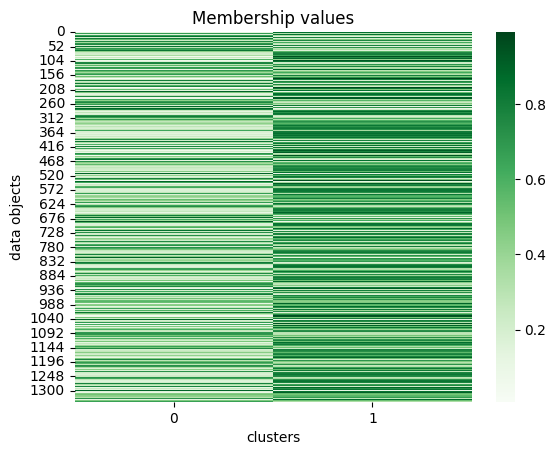

In [34]:
import seaborn as sns
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=False)
plt.title("Membership values")
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()